In [4]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [6]:
airlines_data = pd.read_csv('C:/Users/home/Clustering/EastWestAirlines.csv')
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Standardization

In [9]:
scaler= StandardScaler()
standardize_data= pd.DataFrame(scaler.fit_transform(airlines_data.iloc[:,1:]))
standardize_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [10]:
standardize_data.columns=airlines_data.iloc[:,1:].columns

In [11]:
standardize_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


### Normalization

In [12]:
normalized_data = pd.DataFrame(normalize(airlines_data.iloc[:,1:]))
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


## Heirarchical Model

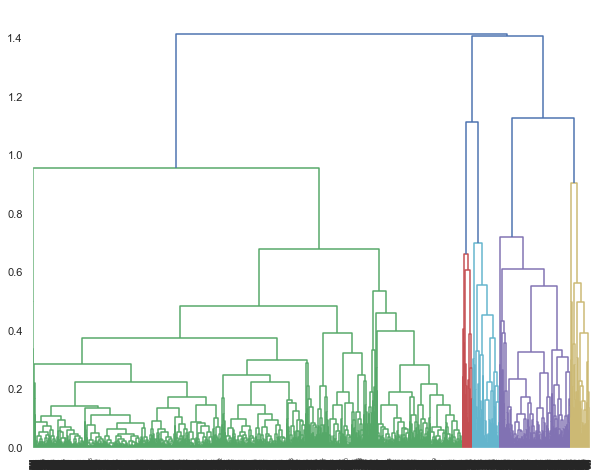

In [13]:
# Ploting dendogram
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(normalized_data,method='complete'))

In [14]:
#create clusters
Clusters= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [15]:
Hierarchical_df=airlines_data.copy()
Hierarchical_df['Cluster_ID']=Clusters.fit_predict(normalized_data)
Hierarchical_df.drop('ID#',axis=1,inplace=True)

In [16]:
Hierarchical_df.groupby('Cluster_ID').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


In [17]:
Hierarchical_df.Cluster_ID.value_counts()#.sort_values(ascending=False)

2    1547
4    1191
3     579
1     453
0     229
Name: Cluster_ID, dtype: int64

## KMeans

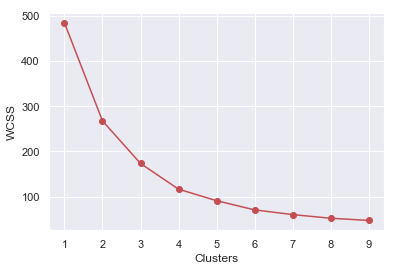

In [18]:
#calculating wcss
wcss= []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++')#,random_state=4)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,"o-r")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show();

In [19]:
wcss

[484.8511291307252,
 267.59741095991853,
 173.27025625511413,
 116.32318387969113,
 90.82410184483533,
 70.47259690965797,
 60.07665106585186,
 51.93497549638353,
 47.170901356964436]

In [20]:
kmeans = KMeans(n_clusters=5,random_state=44)
kmeans.fit(normalized_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=44, tol=0.0001, verbose=0)

In [21]:
kmeans_df=airlines_data.copy()
kmeans_df.drop('ID#',axis=1,inplace=True)

In [22]:
kmeans_df['Cluster_ID']= kmeans.labels_
kmeans_df.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,16420,0,1,1,1,0,0,0,0,6942,0,4
6,84914,0,3,1,1,27482,25,0,0,6994,0,3
7,20856,0,1,1,1,5250,4,250,1,6938,1,4
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0


In [23]:
kmeans_df.groupby('Cluster_ID').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
0,97404.291181,185.412972,1.605693,1.009333,1.001867,9644.338777,9.705553,520.156790,1.564629,3960.423238,0.269249
1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409
2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
3,70716.849751,116.237811,3.134328,1.025871,1.019900,32537.162189,17.630846,443.296517,1.313433,4046.183085,0.491542
4,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680


In [24]:
kmeans_df.Cluster_ID.value_counts()

0    2143
3    1005
4     388
1     352
2     111
Name: Cluster_ID, dtype: int64

## DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
#Epsilon value given by domain expert
dbscan = DBSCAN(eps=0.08,min_samples=5)
dbscan.fit(normalized_data)

DBSCAN(algorithm='auto', eps=0.08, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [27]:
clusters_data=pd.DataFrame(dbscan.labels_,columns=['Cluster_ID'])
clusters_data['Cluster_ID'].value_counts()

 0    3893
-1      90
 1       9
 3       5
 2       2
Name: Cluster_ID, dtype: int64

Text(0, 0.5, 'Balance')

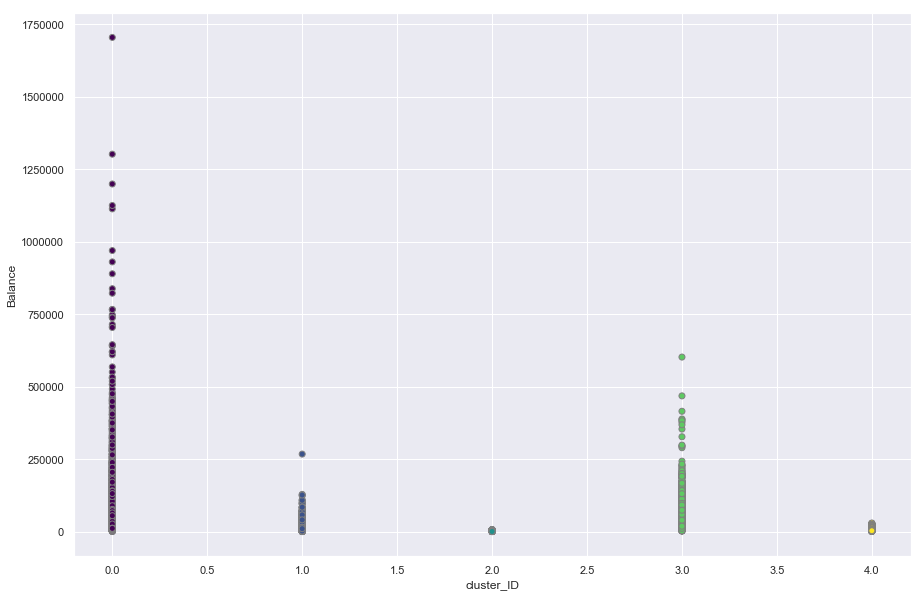

In [28]:
#Clusters Visualization
colors=plt.get_cmap('viridis')
plt.figure(figsize=(15, 10))  
plt.scatter(kmeans_df['Cluster_ID'],kmeans_df['Balance'], c=kmeans.labels_,cmap=colors,edgecolors='grey') 
plt.xlabel("cluster_ID")
plt.ylabel("Balance")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


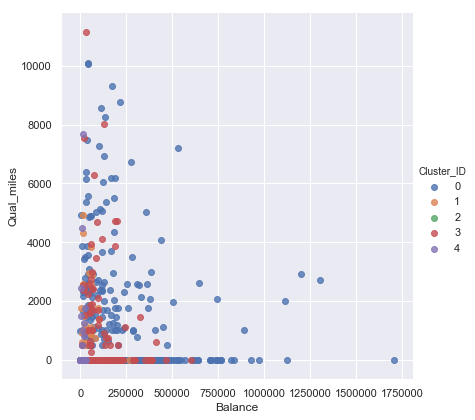

In [30]:
# Plot between pairs Balance~Qual_miles
sns.lmplot( 'Balance','Qual_miles',  data=kmeans_df,
        hue = 'Cluster_ID',
        fit_reg=False, size = 6 );

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


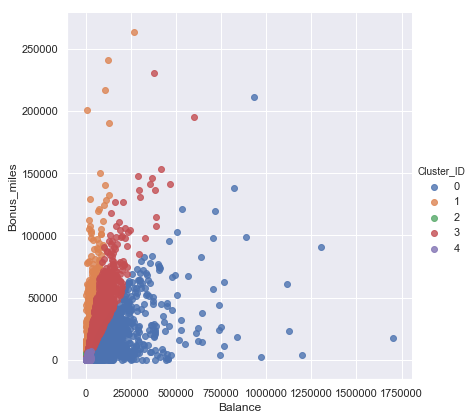

In [31]:
# Plot between pairs Balance~Bonus_miles
sns.lmplot( 'Balance','Bonus_miles',  data=kmeans_df,
        hue = 'Cluster_ID',
        fit_reg=False, size = 6 )

In [32]:
model1=KMeans(n_clusters=5) 
model1.fit(normalized_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
model1.labels_

array([0, 4, 0, ..., 2, 0, 4])

In [34]:
model1.cluster_centers_

array([[9.87347192e-01, 3.41837203e-03, 3.52620775e-05, 3.03479065e-05,
        3.02349363e-05, 9.15517711e-02, 1.54818686e-04, 6.61324432e-03,
        2.08325733e-05, 7.54676163e-02, 3.99111816e-06],
       [5.14097044e-01, 2.46403313e-03, 9.56772813e-05, 5.01782621e-05,
        4.88674224e-05, 8.02764990e-01, 5.20805294e-04, 1.79689628e-02,
        6.06455235e-05, 1.36723853e-01, 3.06681430e-05],
       [8.90527678e-01, 1.91114047e-03, 5.81321812e-05, 3.02250715e-05,
        2.95023684e-05, 4.23591789e-01, 4.07332101e-04, 7.83191039e-03,
        2.30605390e-05, 8.30790414e-02, 1.00466076e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-05],
       [8.92936852e-01, 4.46454511e-03, 1.23968035e-04, 1.23783403e-04,
        1.23783403e-04, 7.58365867e-02, 2.93996886e-04, 6.32105922e-03,
        2.08016784e-05, 4.07924096e-01, 1.35510886e-